In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Seeing how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables affect the launch outcome.

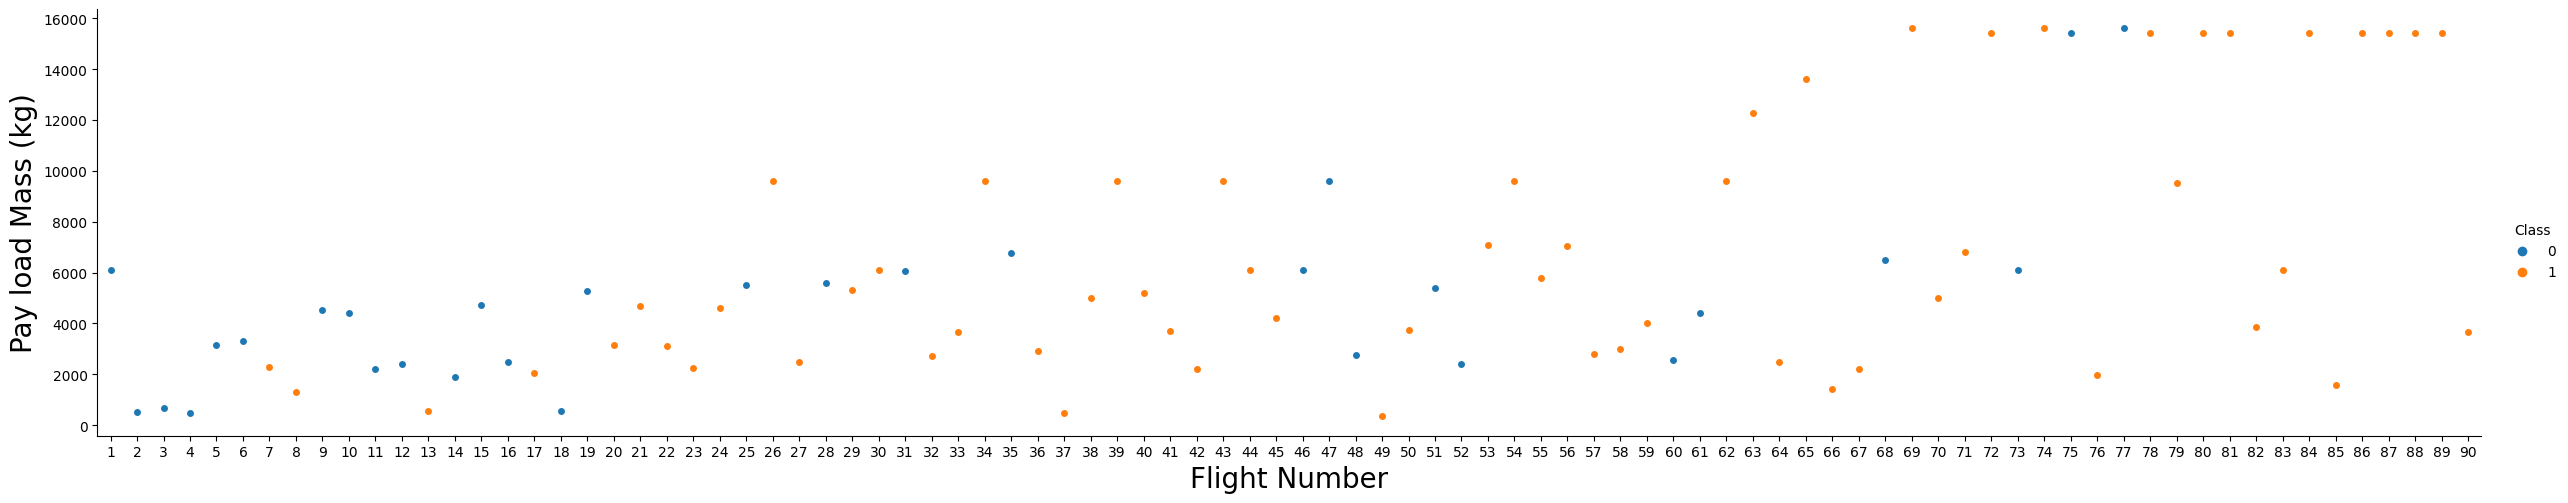

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

Seeing how the `FlightNumber` (indicating the continuous launch attempts.) and `Launch Site` variables affect the launch outcome.

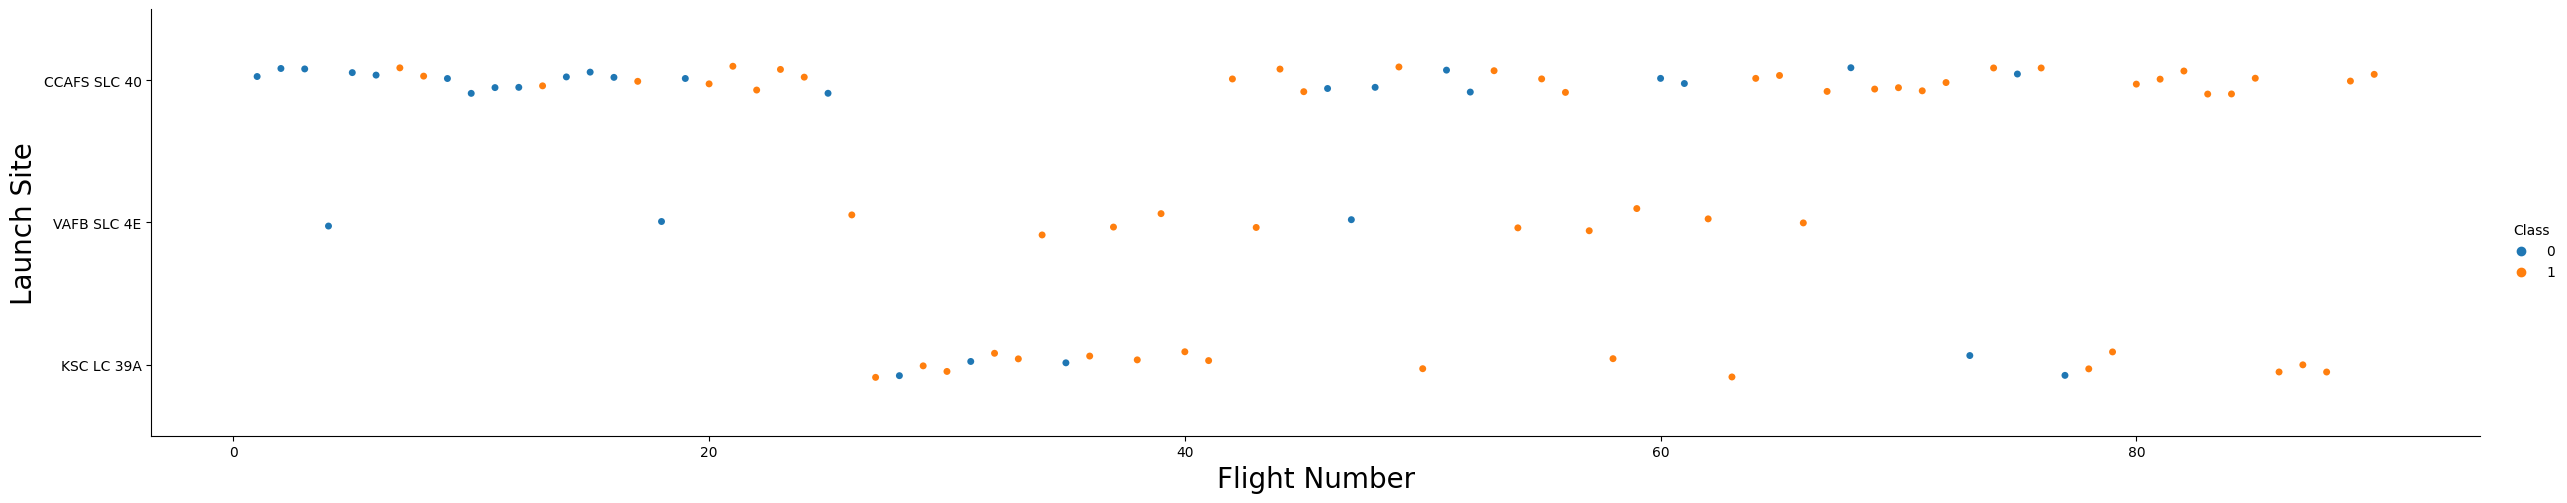

In [4]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully. <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

Seeing how the `Launch Site` and `Payload` variables affect the launch outcome.

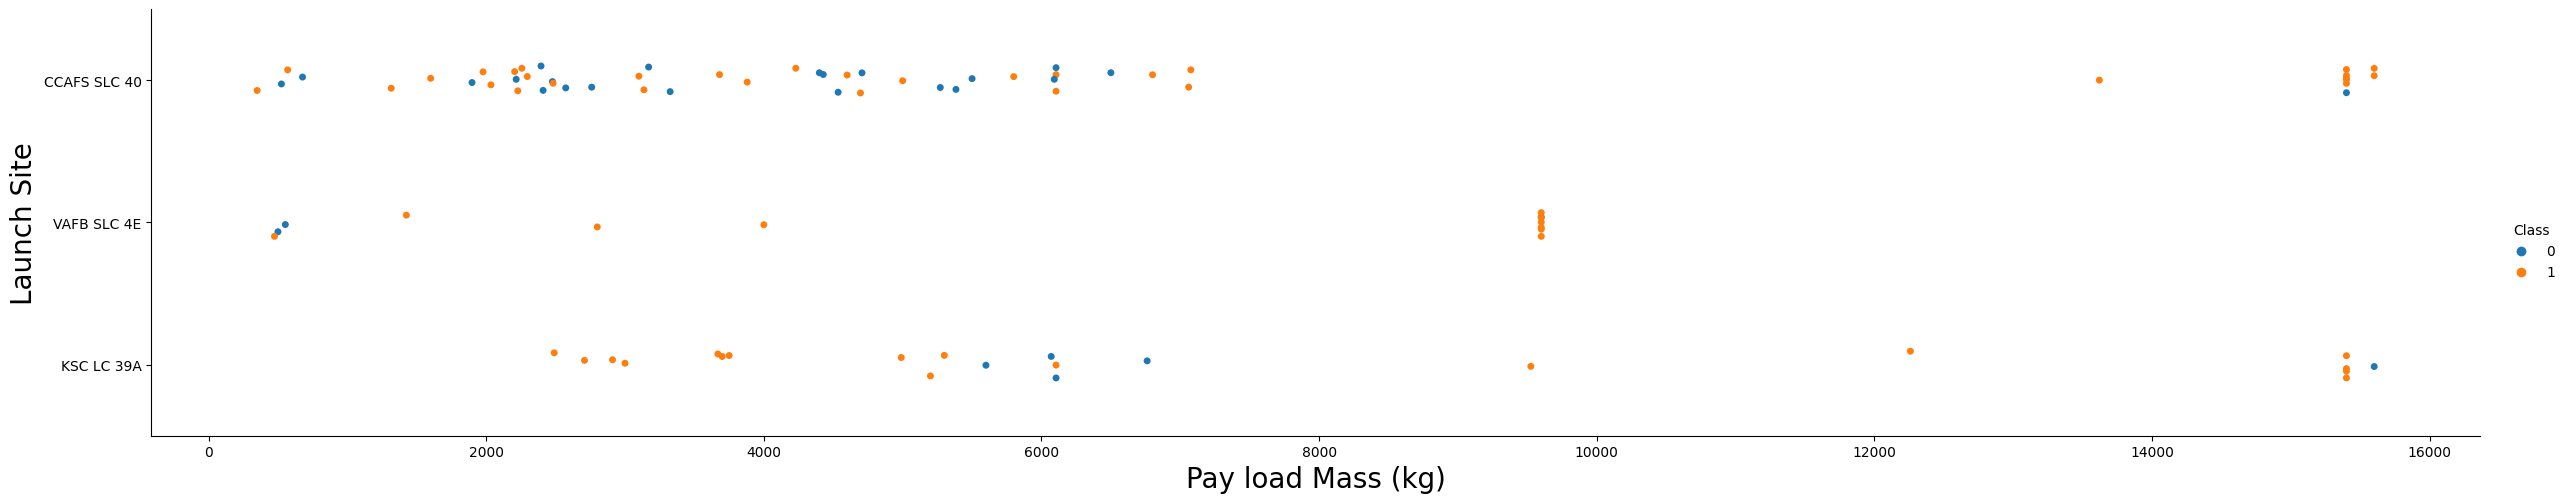

In [5]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

For VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

Checking if there is any relationship between <code>success rate</code> and <code>orbit type</code>.

C:\Users\vaasa\AppData\Local\Temp\ipykernel_15672\974749768.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = df.groupby(["Orbit"]).mean().reset_index()
C:\Users\vaasa\AppData\Local\Temp\ipykernel_15672\974749768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2["Class"] = temp2["Class"]*100


Text(0, 0.5, 'Success Rate')

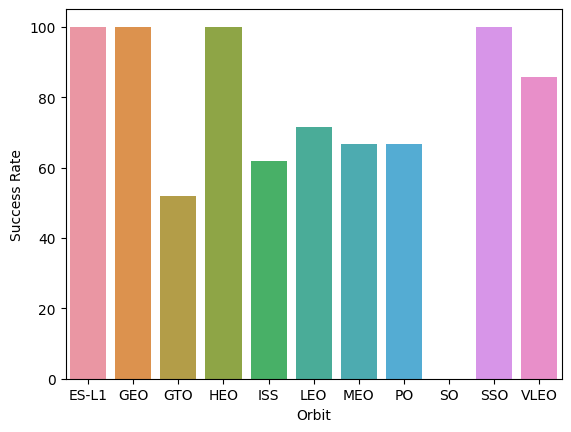

In [6]:
temp = df.groupby(["Orbit"]).mean().reset_index()
temp2 = temp[["Orbit", "Class"]]
temp2["Class"] = temp2["Class"]*100
sns.barplot(x = "Orbit", y = "Class", data = temp2)
plt.ylabel('Success Rate')

Checking if there is any relationship between <code>Flight Number</code> and <code>orbit type</code>.

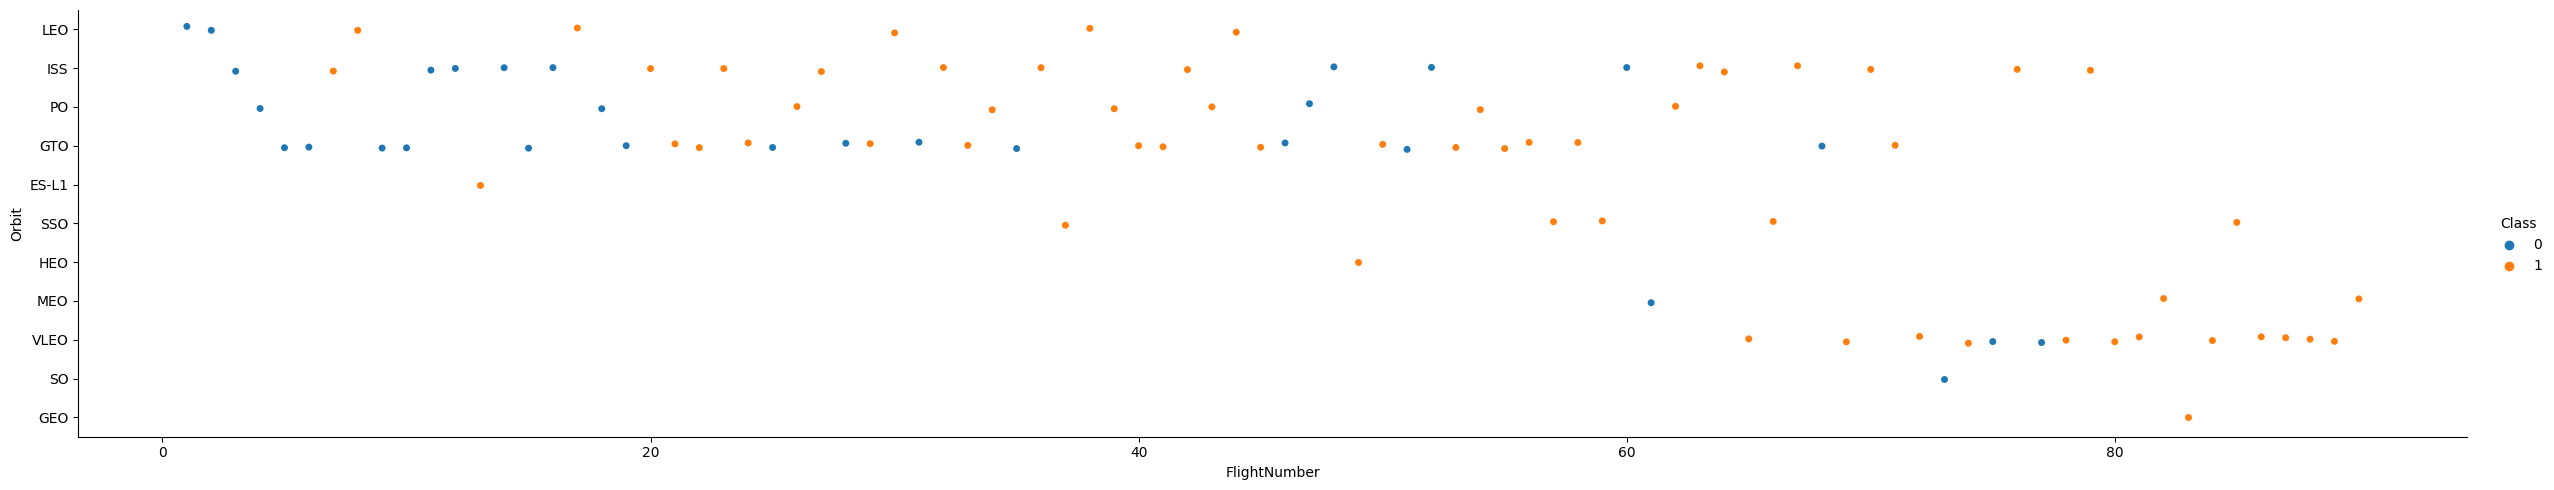

In [7]:
sns.catplot(x='FlightNumber',y='Orbit',data=df,hue='Class',aspect=5)

In the LEO orbit the Success appears related to the number of flights. There seems to be no relationship between flight number in GTO orbit.

Checking if there is any relationship between <code>Payload</code> and <code>orbit type</code>.

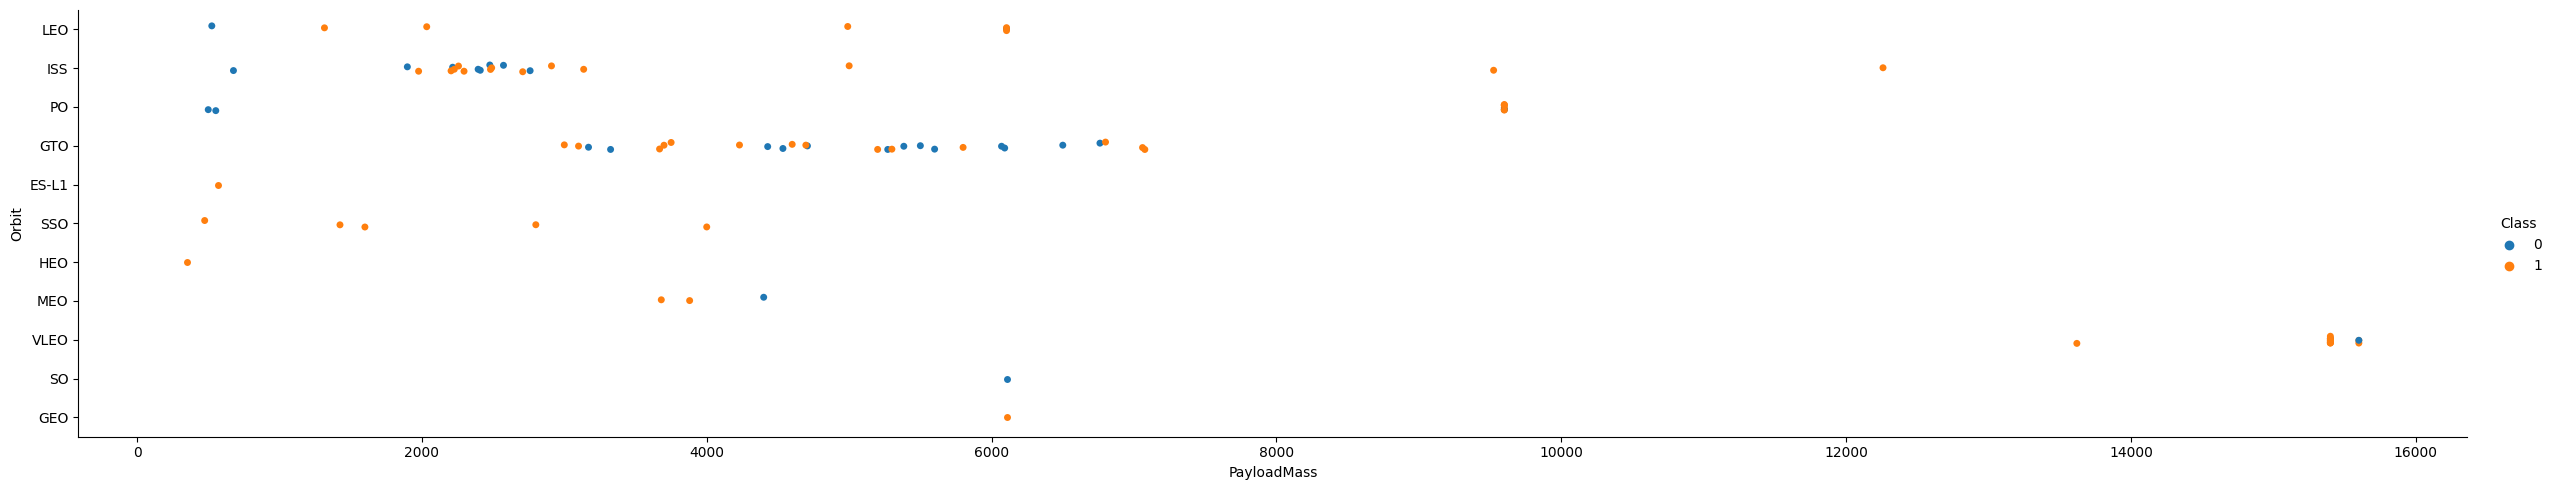

In [8]:
sns.catplot(x='PayloadMass',y='Orbit',data=df,hue='Class',aspect=5)

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.</br> 
However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

Ploting a line chart with x axis to be <code>Year</code> and y axis to be <code>success</code> rate, to get the average launch success trend. 

In [9]:
#Fxn to get yr
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

<AxesSubplot: xlabel='year', ylabel='Success Rate'>

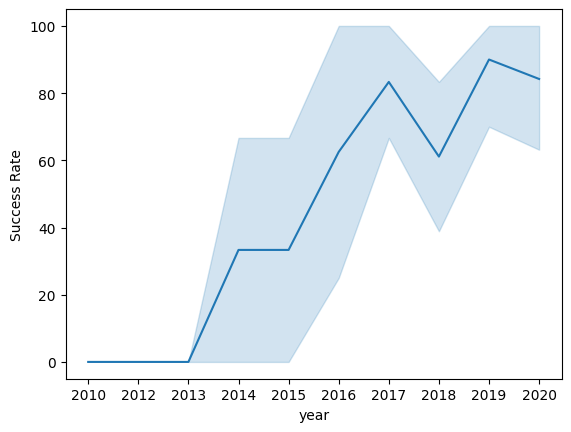

In [10]:
year = []
df["year"] = Extract_year(year)
df["Success Rate"] = df["Class"] * 100
sns.lineplot(data = df, x = "year", y = "Success Rate")

Feature Engineering

In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


Converting categorical features using pd.get_dummies

In [12]:
oh_orbit = pd.get_dummies(features["Orbit"])
oh_launch = pd.get_dummies(features["LaunchSite"])
oh_landing = pd.get_dummies(features["LandingPad"])
oh_serial = pd.get_dummies(features["Serial"])
features_one_hot = pd.concat([oh_orbit, oh_launch, oh_landing, oh_serial], axis=1)
features_one_hot.astype('float64') #Converting all to float64
features_one_hot.head()

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
